# AM 207 Pset 3

## Spencer Hallyburton

## Collaborator: Salvador Barragan

In [1]:
# Up-front things
import matplotlib.pyplot as plt
import numpy as np
import csv
import random
import math
import time

# Seed a random number generator
np.random.seed(99)


# Problem 1: Optimization via Descent

Given this loss function for a point (x,y):
$$
L(x, y, \lambda_1, \lambda_2) = 0.000045\lambda_2^2 y - 0.000098\lambda_1^2 x + 0.003926\lambda_1 x\exp\left\{\left(y^2 - x^2\right)\left(\lambda_1^2 + \lambda_2^2\right)\right\}
$$
We need to implement methods to determine our parameters that minimze the loss function over a set of data.

In [2]:
my_data = np.genfromtxt('HW3_data.csv', delimiter=',')
print('Data Shape:', my_data.shape)

Data Shape: (2, 16000)


### Part A.1: Visualize Minimum

In [3]:
# Set up functions
from mpl_toolkits.mplot3d import Axes3D

def error(X, Y, LAMBDA):
    T1 =  .000045*LAMBDA[1]**2 * Y 
    T2 = -.000098*LAMBDA[0]**2 * X
    T3 =  .003926*LAMBDA[0] * X * np.exp( (Y**2 - X**2) * (LAMBDA[0]**2 + LAMBDA[1]**2) )
    return np.sum(T1 + T2 + T3)

def make_3d_plot(xfinal, yfinal, zfinal, history, loss, X, Y):
    L1s = np.linspace(xfinal - 10 , xfinal + 10, 40)
    L2s = np.linspace(yfinal - 10 , yfinal + 10, 40)
    L1, L2 = np.meshgrid(L1s, L1s)
    zs = np.array([error(X, Y, LAMBDA) 
                   for LAMBDA in zip(np.ravel(L1), np.ravel(L2))])
    Z = zs.reshape(L1.shape)
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    off = -10
    ax.plot_surface(L1, L2, Z, rstride=1, cstride=1, color='b', alpha=0.1)
    ax.contour(L1, L2, Z, 20, alpha=0.5, offset=off, stride=30)
    ax.set_xlabel('Lambda 1')
    ax.set_ylabel('Lambda 2')
    ax.set_zlabel('Loss Function')
    ax.view_init(elev=30., azim=30)
    ax.plot([xfinal], [yfinal], [zfinal] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7);
    ax.plot([t[0] for t in history], [t[1] for t in history], loss , markerfacecolor='b', markeredgecolor='b', marker='.', markersize=5);
    ax.plot([t[0] for t in history], [t[1] for t in history], off , alpha=0.5, markerfacecolor='r', markeredgecolor='r', marker='.', markersize=5)
    plt.show()
    
def gd_plot(X, Y, LAMBDA, loss, history):
    if not isinstance(loss, list):
        loss = [loss]
    make_3d_plot(LAMBDA[0], LAMBDA[1], loss[-1], history, loss, X, Y)
    

Cost given optimal Lambda: -9.93410402544


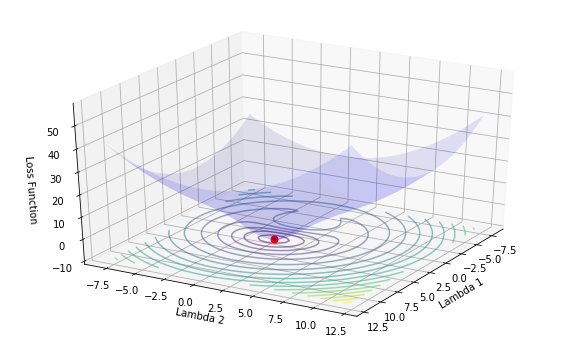

In [4]:
# Test out a lambda point:
LAM_optimal = [2.05384, 0]
cost_optimal = error(my_data[0,:], my_data[1,:], LAM_optimal)
history = [LAM_optimal]
print('Cost given optimal Lambda:', cost_optimal)
gd_plot(my_data[0,:], my_data[1,:], LAM_optimal, cost_optimal, history)

Given that we have an analytic equation for the cost function, we can compute the gradient function by differentiating our cost function with respect to the parameters, $\lambda_1$ and $\lambda_2$. Doing so yields the following gradient function:

### Part A.2: Gradient Descent Learning

In [5]:
# Implementing Gradient Descent:
def grad_fun(x, y, LAM):
    A = .000045
    B = -.000098
    C = .003926
    EXPONENT = np.exp((y**2-x**2) * (LAM[0]**2 + LAM[1]**2))
    dLd1 = 2*B*LAM[0]*x + C*x*EXPONENT + C*LAM[0]*x*((y**2-x**2)*2*LAM[0])*EXPONENT
    dLd2 = 2*A*LAM[1]*y + C*LAM[0]*x*((y**2-x**2)*2*LAM[1])*EXPONENT
    
    return [np.sum(dLd1), np.sum(dLd2)]
    
    
def gradient_descent(x, y, LAM_init, step=0.001, maxsteps=0, precision=0.00001):
    costs = []
    m = y.size # number of data points
    LAM = LAM_init
    LAM_true = [2.05384, 0]
    history = [] # to store all thetas
    counter = 0
    oldcost = 0
    currcost = error(x, y, LAM)
    counter+=1
    time_iter = 0
    while np.linalg.norm(np.array(LAM) - LAM_true) / np.linalg.norm(LAM_true) > precision:
        # abs(currcost - oldcost) > precision
        t0 = time.time()
        oldcost=currcost
        gradient = np.asarray(grad_fun(x, y, LAM))
        
        LAM = LAM - step * gradient  # update
        t1 = time.time()
        time_iter += (t1 - t0)

        history.append(LAM)
        
        currcost = error(x, y, LAM)
        costs.append(currcost)
        
        if counter % 500 == 0: print('COST @ %i = %.4f' % (counter, currcost))
        counter+=1

        if maxsteps:
            if counter == maxsteps:
                break
        
    return history, costs, counter, time_iter/counter

In [6]:
# Perform gradient descent calculation:
LAM_init = [5, 5] + np.random.rand(2)
print('Initial Guess of Lambda:', LAM_init)
history, costs, counter, time_iter = gradient_descent(my_data[0,:], my_data[1,:], LAM_init)
print('Iterations:', counter)
print('Final Lambda:', history[-1])

Initial Guess of Lambda: [ 5.67227856  5.4880784 ]
COST @ 500 = 7.2020
COST @ 1000 = 0.2670
COST @ 1500 = -7.9419
COST @ 2000 = -9.7618
COST @ 2500 = -9.9206
COST @ 3000 = -9.9331
COST @ 3500 = -9.9340
COST @ 4000 = -9.9341
COST @ 4500 = -9.9341
COST @ 5000 = -9.9341
COST @ 5500 = -9.9341
Iterations: 5873
Final Lambda: [  2.05384898e+00   1.84535512e-05]


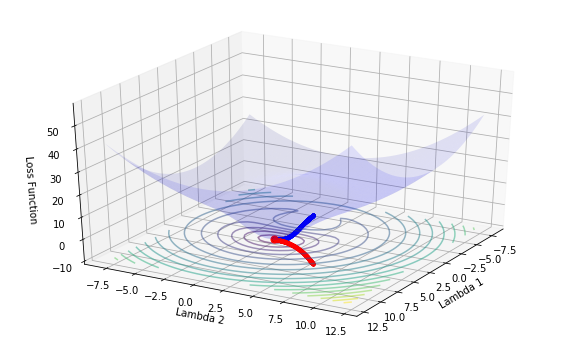

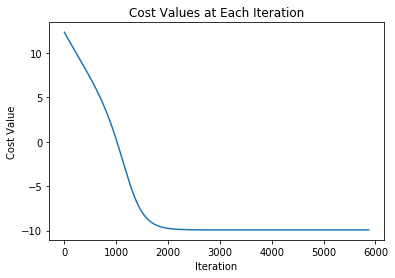

In [7]:
# Visualize Gradient Descent:
gd_plot(my_data[0,:], my_data[1,:], history[-1], costs, history)

# Plotting Cost Reduction
plt.plot(range(len(costs)), costs);
plt.xlabel('Iteration')
plt.ylabel('Cost Value')
plt.title('Cost Values at Each Iteration')
plt.show()

### Part A.3 Stochastic Gradient Descent

In [8]:
def sgd_minibatch(x, y, LAM, batchsize=1, step=0.001, maxsteps=0, maxepochs=0, precision=0.0001):
    LAM_true = [2.05384, 0]
    m = y.size # number of data points
    costs = []
    history = []
    grads = []
    costsum = 0
    costsum2 = 0
    counter = 0
    currcost = 0
    oldcost = 0
    i = 0
    counter+=1
    time_iter = 0
    
    # Shuffle the data
    neworder = np.random.permutation(m)
    xdata_shuf = x[neworder]     
    ydata_shuf = y[neworder]
        
    # Print Status
    print('Performing SGD With Batchsize =', batchsize)
    epoch = 0; print('Epoch: ',epoch)
    while np.linalg.norm(np.array(LAM) - LAM_true) / np.linalg.norm(LAM_true) > precision:
        # Get next batch:
        last_idx = min(m, (i+1)*batchsize)
        xvals = np.asarray(xdata_shuf[i:last_idx])
        yvals = np.asarray(ydata_shuf[i:last_idx])

        # Get the current cost
        oldcost=currcost
        currcost = error(xvals, yvals, LAM)
        costsum += currcost
        costs.append(currcost)
        costsum2 += currcost
        
        # Append the last lambda:
        history.append(LAM)

        # Compute gradient
        t0 = time.time()
        gradient = np.asarray(grad_fun(xvals, yvals, LAM))
        gradient = gradient * np.sqrt(m)/batchsize
        grads.append(gradient)
        
        # Update Lambda
        LAM = LAM - step * gradient  # update
        t1 = time.time()
        time_iter += t1-t0
        
        # Check if reached the end and need new epoch
        i+=batchsize
        counter+=1
        if i>=m: #reached one past the end
            epoch+=1
            # Shuffle the data
            neworder = np.random.permutation(m)
            xdata_shuf = x[neworder]     
            ydata_shuf = y[neworder] 
            if (epoch % 2 == 1):
                print('Epoch: ', epoch, 'Cost:', costsum2)
            costsum2 = 0
            i=0

        # Check if max steps reached`
        if maxsteps:
            if counter == maxsteps:
                print('Max Steps Reached')
                break
        
        # Check if max epochs reached
        if maxepochs:
            if epoch == maxepochs:
                print('Max Epochs Reached')
                break
                
    print('Tolerance At End:', np.linalg.norm(np.array(LAM) - LAM_true) / np.linalg.norm(LAM_true))
        
    return history, costs, counter, time_iter/counter, epoch, grads


In [9]:
# Perform calculation
batchsize=1
LAM_init = [5, 5]
history2, costs2, counter2, time_iter2, epoch2, grads2 = sgd_minibatch(my_data[0,:], my_data[1,:], LAM_init, 
                                                   batchsize, maxepochs=500, precision=1e-3, step=.001)

Performing SGD With Batchsize = 1
Epoch:  0
Epoch:  1 Cost: 13.8145939166
Epoch:  3 Cost: 11.4412415092
Epoch:  5 Cost: 9.78873225393
Epoch:  7 Cost: 7.24117179397
Epoch:  9 Cost: 4.78839931459
Epoch:  11 Cost: 1.61053003781
Epoch:  13 Cost: -6.12586006521
Epoch:  15 Cost: -9.69004902943
Epoch:  17 Cost: -9.92044454601
Epoch:  19 Cost: -9.93367548492
Tolerance At End: 0.000998776797835


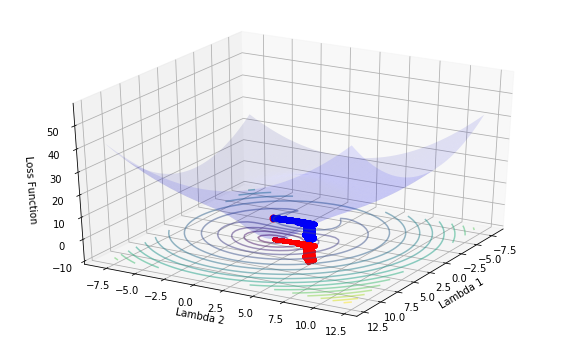

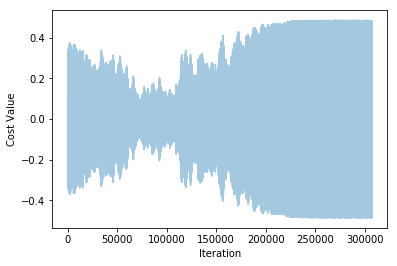

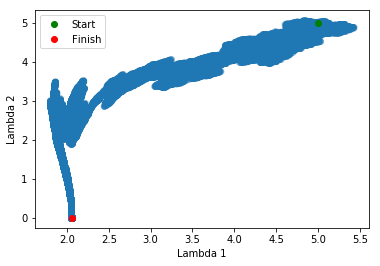

In [10]:
# Visualize Output SGD Plots
gd_plot(my_data[0,:], my_data[1,:], history2[-1], costs2, history2)

# Costs
plt.plot(range(len(costs2)), costs2, alpha=0.4);
plt.xlabel('Iteration')
plt.ylabel('Cost Value')
plt.show()

# Parameters
plt.plot([t[0] for t in history2], [t[1] for t in history2],'o-', alpha=0.1)
plt.plot(history2[0][0], history2[0][1], 'go', label='Start')
plt.plot(history2[-1][0], history2[-1][1], 'ro', label='Finish')
plt.xlabel('Lambda 1')
plt.ylabel('Lambda 2')
plt.legend()
plt.show()


## Part B:
### 1) Average Time

In [11]:
print('Average Time Gradient Descent: %.4e' % time_iter)
print('Average Time SGD: %.4e' % time_iter2)

Average Time Gradient Descent: 7.5680e-04
Average Time SGD: 5.5114e-05


We see that the average time for an iteration of SGD is less than that of an iteration of gradient descent. To discuss this, we need to first clarify what we are considering an iteration. In the case of gradient descent, an iteration is when the entire set of data passes through the gradient calculation. In the SGD case, an iteration is when one batch of data passes through the gradient calculation. From this definition, we would expect SGD to have a lower cost given that there are less gradient calculations to be performed per iteration.

### 2) Number of iterations to obtain estimate of 1e-3

In [12]:
LAM_init = [5,5]
batchsize = 1
print('Gradient Descent:')
_, _, counter, _ = gradient_descent(my_data[0,:], my_data[1,:], LAM_init, precision=1e-3)
print('Stochastic:')
_, _, counter2, _, _, _ = sgd_minibatch(my_data[0,:], my_data[1,:], LAM_init, batchsize, maxepochs=50, precision=1e-3)

Gradient Descent:
COST @ 500 = 4.2031
COST @ 1000 = -4.4244
COST @ 1500 = -9.3019
COST @ 2000 = -9.8831
COST @ 2500 = -9.9301
COST @ 3000 = -9.9338
COST @ 3500 = -9.9341
Stochastic:
Performing SGD With Batchsize = 1
Epoch:  0
Epoch:  1 Cost: 13.7863230566
Epoch:  3 Cost: 11.4570244216
Epoch:  5 Cost: 9.51553364428
Epoch:  7 Cost: 7.33420947612
Epoch:  9 Cost: 5.40455205171
Epoch:  11 Cost: 3.78455794143
Epoch:  13 Cost: 0.155861875468
Epoch:  15 Cost: -7.71616925389
Epoch:  17 Cost: -9.83088519569
Epoch:  19 Cost: -9.92923194669
Epoch:  21 Cost: -9.93384681427
Tolerance At End: 0.000991130015707


In [13]:
print('Iterations for GD: %d' % counter)
print('Iterations for SGD: %d' % counter2)

Iterations for GD: 3792
Iterations for SGD: 339272


We can see above that gradient descent performs much fewer iterations to converge to the predetermined precision value. This makes sense based on the way we are defining an iteration. In the case of gradient descent, the algorithm sees an entire set of data after one iteration. In the case of SGD, an iteration is a single data point. As a result, it is still impressive that SGD is able to converge within the precision value, given that it is seeing 1/16000 points of data at each iteration.

## Part C: Comparing performance for various learning rates

### Learning Rate

In [14]:
import sys
import os
old_stdout = sys.stdout

# Prevent functions from printing to the screen
LRs = [1, 0.1, 0.001, 0.0001]
counterSGD = np.zeros(len(LRs))
# Run loop over all LRs
for i in range(len(LRs)):
    sys.stdout = open(os.devnull, "w")
    _, _, counterSGD[i], _, _, _ = sgd_minibatch(my_data[0,:], my_data[1,:], LAM_init, batchsize, step=LRs[i],
                                            maxepochs=50,maxsteps=1000000, precision=1e-2)
    sys.stdout = old_stdout
    print('Learning Rate=%.4f -- Iterations: %d' % (LRs[i], counterSGD[i]))



Learning Rate=1.0000 -- Iterations: 5735
Learning Rate=0.1000 -- Iterations: 28
Learning Rate=0.0010 -- Iterations: 273232
Learning Rate=0.0001 -- Iterations: 800001


In the above section, we calculate the number of iterations required to reach a precision of 1e-2 when compared to the optimal value of the parameters. We see an interesting behavior. The minimum number of iterations required to converge to the solution is 0.100. This is two orders of magnitude larger than that of the learning rate we initially used. The longest convergence time occurs at a learning rate of .0001. This case maxes out the number of epochs and does not reach the convergence criteria. The two cases surrounding 0.100 both have advantages over the low learning rate case. When making the choice of the learning rate, one has to take into consideration several factors including the amount of data present, and it is always a good idea to try several learning rates to try and observe a pattern in the results.

# Problem 2: SGD For Multinomial Logistic Regression

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
from torch.autograd import Variable


In [5]:
import torchvision.datasets as dset
root = './data'

# Perform image transfers on the input data
trans = transforms.Compose(
    [transforms.ToTensor(), 
])

batch = 64
# Load training and testing data
trainset = dset.MNIST(root, train=True, transform=trans, target_transform=None, download=False)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch,
                                          shuffle=True, num_workers=2)

testset = dset.MNIST(root, train=False, transform=trans, target_transform=None, download=False)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch,
                                         shuffle=False, num_workers=2)


### Part 1) Plotting 10 Sample Images

Test Tensor Size: torch.Size([64, 1, 28, 28])


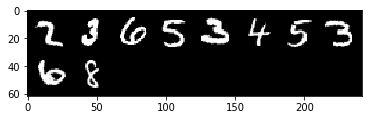

    2     3     6     5     3     4     5     3     6     8


In [17]:
#NOTE: Inspiration for this methodology was taken from the PYTORCH tutorials at http://pytorch.org/tutorials/

import matplotlib.pyplot as plt
import numpy as np

# Define a show image function
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
imsize = images.size(2)
numclasses = 10

# show images
numprint = 10
print('Test Tensor Size:', images.size())
imshow(torchvision.utils.make_grid(images[0:numprint]))

# print labels
print(' '.join('%5s' % labels[j] for j in range(images[0:numprint].size(0))))

### Part 2: Softmax formulation - Multinomial Regression


In [18]:
# Create model class
class Model(torch.nn.Module):

    def __init__(self):
        """
        In the constructor we instantiate two nn.Linear module
        """
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(imsize**2, numclasses)  # One in and one out

    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Variables.
        """
        # Reshape the size of the variables
        x = x.view(x.size(0), -1)
        
        y_pred = self.linear(x)
        y_out = F.softmax(y_pred, dim=0)
        return y_out

In [19]:
# our model
model = Model()

# Establish loss function and optimizing algorithm
criterion = torch.nn.CrossEntropyLoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
loss_total = []
# Training loop
for epoch in range(10):
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)        
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics and concatenate loss normalized by size of batch
        loss_total.append(loss.data[0]/len(labels))
        
        # Add total loss
        running_loss += loss.data[0]
        num_b = 500
        if i % num_b == num_b-1:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / num_b))
            running_loss = 0.0

print('Finished Training')
    

[1,   500] loss: 141.815
[2,   500] loss: 139.247
[3,   500] loss: 139.082
[4,   500] loss: 139.037
[5,   500] loss: 138.986
[6,   500] loss: 138.982
[7,   500] loss: 138.951
[8,   500] loss: 138.929
[9,   500] loss: 138.927
[10,   500] loss: 138.908
Finished Training


### Part 4: Plot the cross-entropy loss on training set as a function of iteration

In the graph below, we see the cross entorpy loss at each iteration. In this plot, I have normalized it by the size of the batch so that a smaller batch size (such as the last batch) would not show any difference, in theory, to the other batches. That said, we can still see some sharp dips in the cross entropy loss. I anticipate that this is still due to the difference size of the last batch. 

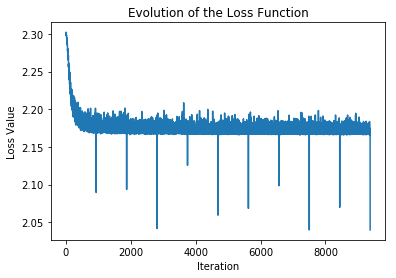

In [20]:
plt.plot(loss_total)
plt.xlabel('Iteration')
plt.ylabel('Loss Value')
plt.title('Evolution of the Loss Function')
plt.show()

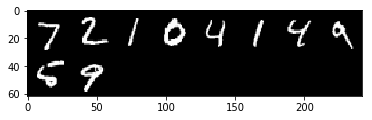

GroundTruth:      7     2     1     0     4     1     4     9     5     9
Predicted:        7     2     1     0     4     1     4     9     2     9


In [21]:
# After training, run predictions
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images[0:numprint]))
print('GroundTruth: ', ' '.join('%5s' % labels[j] for j in range(numprint)))

outputs = model(Variable(images))

_, predicted = torch.max(outputs.data, 1)

print('Predicted:   ', ' '.join('%5s' % predicted[j]
                              for j in range(numprint)))

### 4. Training and test set accuracies

In [22]:
# Training Set:
correct_tr = 0
total_tr = 0
for data in trainloader:
    images, labels = data
    outputs = model(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total_tr += labels.size(0)
    correct_tr += (predicted == labels).sum()

# Test set
correct_ts = 0
total_ts = 0
for data in testloader:
    images, labels = data
    outputs = model(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total_ts += labels.size(0)
    correct_ts += (predicted == labels).sum()
    
print('Accuracy of the network on the %d train images: %d' % (total_tr ,100 * correct_tr / total_tr))
print('Accuracy of the network on the %d test images: %d' % (total_ts ,100 * correct_ts / total_ts))

Accuracy of the network on the 60000 train images: 80
Accuracy of the network on the 10000 test images: 83


Misclassification Examples:


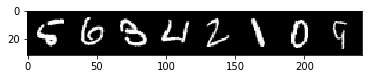

GroundTruth:
     2    8    6    0    3    3    8    5


In [23]:
# Show examples of misclassification:
dataiter = iter(testloader)
misclass = 0
im_misclass = torch.Tensor()
pred_mis = []
numprint = 8
while misclass < numprint:
    # Get the next set of data
    images, labels = next(dataiter)
    output = model(Variable(images))
    _, pred = torch.max(output.data, 1)

    # Loop over elements in the set
    for im, lab, pred in zip(images, labels, pred):
        im = im.unsqueeze(0)
        if (not (lab == pred)) & (misclass<numprint):
            im_misclass = torch.cat((im_misclass, im), dim=0)
            pred_mis.append(pred)
            misclass += 1
            
# Show misclassified images:
print('Misclassification Examples:')
imshow(torchvision.utils.make_grid(im_misclass))
print('GroundTruth:\n ', ' '.join('%4s' % j for j in pred_mis))